In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install trusspy
import trusspy as tp

# init model
M = tp.Model()


         _____                  ______      
        |_   _|                 | ___ \     
          | |_ __ _   _ ___ ___ | |_/ /   _ 
          | | '__| | | / __/ __||  __/ | | |
          | | |  | |_| \__ \__ \| |  | |_| |
          \_/_|   \__,_|___/___/\_|   \__, |
                                       __/ |
                                      |___/ 
        
        TrussPy - Object Oriented Truss Solver for Python
                  Version 2018.08 (Build 20180829)

        Author: Dutzler A.
                Graz University of Technology, 2018
                
        TrussPy  Copyright (C) 2018  Andreas Dutzler
        This program comes with ABSOLUTELY NO WARRANTY; 
        for details type `trusspy.show_w()'.
        This is free software, and you are welcome to redistribute it
        under certain conditions; type `trusspy.show_c()' for details.
        

# Initialize Model
* loading Managers

    - finished.



In [4]:
# create nodes
#
#    tp.Node( label,  coord  )
# ----------------------------
N1 = tp.Node(     1, (0,0,0) )
N2 = tp.Node(     2, (10,0,0) )

# create element
young = 1
area  = 1
E1 = tp.Element( 1, [1,2], material_properties=[young], geometric_properties=[area] )

In [5]:
# create displacement (U) boundary conditions
B1 = tp.BoundaryU( 1, (0,0,0) )
B2 = tp.BoundaryU( 2, (1,0,0) )

# create external forces
# F1 = tp.ExternalForce( 1, (0,0,0) ) # not necessary
F2 = tp.ExternalForce( 2, (-1,0,0) )

In [6]:
M.Settings.dlpf = 0.02 # maximum allowed incremental load-proportionality-factor
M.Settings.du   = 0.02 # maximum allowed incremental displacement component
M.Settings.incs = 50   # maximum number of increments

In [7]:
# add items to the model
M.Nodes.add_nodes([N1,N2])
M.Elements.add_element(E1)
M.Boundaries.add_bounds_U([B1,B2])
M.ExtForces.add_forces([F2])

# build model and run job
M.build()
M.run()


# Model Summary
    Analysis Dimension      "ndim": 3
    Number of Nodes       "nnodes": 2
    Number of Elements    "nelems": 1
 
    System DOF              "ndof": 6
    active DOF             "ndof1": 1
    locked DOF             "ndof2": 5
 
    active DOF          "nproDOF1": [3]
    fixed  DOF          "nproDOF0": [0 1 2 4 5]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:------------------------------------|:--------|:--|
|Maximum increments                   |   `incs`| 50 |
|Maximum increment recycles           |   `cycl`| 4 |
|Maximum Newton-Rhapson iterations    |   `nfev`| 8 |
|Maximum incremental displacement     |     `du`| 0.02 |
|Maximum incremental LPF              |   `dlpf`| 0.02 |
|Initial control component            |     `j0`| LPF|
|Locked control component             |`j_fixed`| False |
|Maximum incremental overshoot        |  `dxtol`| 1.000001 |
|Tolerance for x                     

|total| sum  | used  |  final  |    | final  |    | final  |    | final  |
|  1  |   2  |  -1   |0.000e+00|   1| -1.0000|   2|  0.1000|   0|     nan|

* final LPF:      0.098

### Increment 50
|Cycle|NR-It.|Control| Norm(g) |i(1)|Value   |i(2)|Value   |i(3)|Value   |
|:---:|:----:|:-----:|:-------:|:--:|:------:|:--:|:------:|:--:|:------:|
|  1  |   0  |  -1   |9.714e-17|   1|      -1|    |        |    |        |

|Cycle|NR-It.|Control| Norm(g) |i(1)|Value   |i(2)|Value   |i(3)|Value   |
|:---:|:----:|:-----:|:-------:|:--:|:------:|:--:|:------:|:--:|:------:|
|     |   1  |       |0.000e+00|    |        |    |        |    |        |
|total| sum  | used  |  final  |    | final  |    | final  |    | final  |
|  1  |   2  |  -1   |0.000e+00|   1| -1.0000|   2|  0.1000|   0|     nan|

* final LPF:        0.1
\pagebreak
 

### Create result object from analysis results for step   1

    write result   1/ 50 (LPF:      0.002)
    write result   2/ 50 (LPF:      0.004)
    write result   3

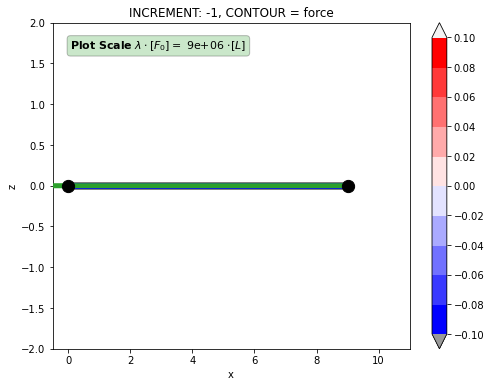

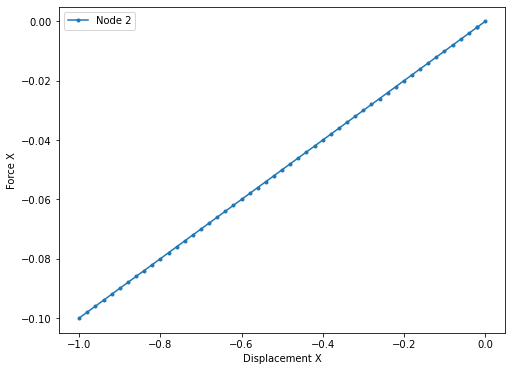

In [9]:
# show results
M.plot_model(config=['deformed'],
             view='xz',
             contour='force',
             lim_scale=(-0.5,11,-2,2),
             force_scale=9e6,
             inc=-1)
M.plot_history(nodes=[2,2], X='Displacement X', Y='Force X')
M.plot_show()